# 参数的更新

#### 1. SGD

In [1]:
class SGD:
    def __init__(self, lr = 0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

#### 2. Momentum

In [2]:
import numpy as np

class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

#### 3. AdGrad

In [3]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.v = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

#### 4. Adam

#### 5. 基于MNIST数据集的更新方法的比较

In [4]:
#optimizer_compare_nmist.py
import os
import sys
sys.path.append(os.pardir)  
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [6]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [7]:
# 1:进行实验的设置==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

In [8]:
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

In [9]:
# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.2904283545427546
Momentum:2.411904717211134
AdaGrad:2.0018461797384433
Adam:2.237951130802924
===========iteration:100===========
SGD:1.4273753586906106
Momentum:0.3152581139900109
AdaGrad:0.09915227928499779
Adam:0.22907515066047873
===========iteration:200===========
SGD:0.7864852347810369
Momentum:0.2640257356227572
AdaGrad:0.10564630165227479
Adam:0.1768888613131852
===========iteration:300===========
SGD:0.6142204594558336
Momentum:0.28814892377417034
AdaGrad:0.13836869632440418
Adam:0.24603465640674171
===========iteration:400===========
SGD:0.45016150270338773
Momentum:0.20583862139500606
AdaGrad:0.0481984971819623
Adam:0.15214198842864435
===========iteration:500===========
SGD:0.31766241562467634
Momentum:0.093712278982744
AdaGrad:0.026307316861570423
Adam:0.07513254988971091
===========iteration:600===========
SGD:0.3530371175042447
Momentum:0.08825143939932008
AdaGrad:0.030549211927315238
Adam:0.06136861457422285
===========iteration:7

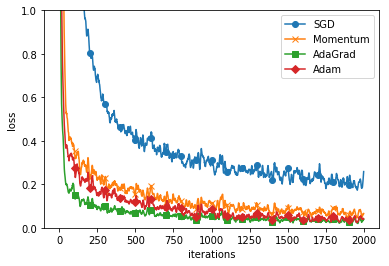

In [10]:
# 3.绘制图形==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 权重的初始值

#### 1. 隐藏层的激活值的分布

In [11]:
#weight_init_activation_histogram.py
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

In [12]:
input_data = np.random.randn(1000, 100)  # 1000个数据
node_num = 100  # 各隐藏层的节点（神经元）数
hidden_layer_size = 5  # 隐藏层有5层
activations = {}  # 激活值的结果保存在这里

In [13]:
x = input_data

In [14]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 改变初始值进行实验！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 将激活函数的种类也改变，来进行实验！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

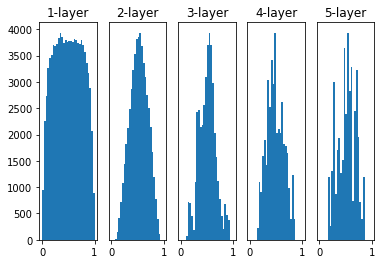

In [15]:
# 绘制直方图
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#### 2. ReLU的 权重初始值

In [16]:
#weight_init_compare.py
from common.optimizer import SGD

In [17]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [18]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [19]:
# 1:进行实验的设置==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [20]:
# 2:开始训练==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.302517162760856
Xavier:2.3015829579822533
He:2.3683082412339638
===========iteration:100===========
std=0.01:2.302993501013975
Xavier:2.2450889513418906
He:1.4646550082801226
===========iteration:200===========
std=0.01:2.302875138062257
Xavier:2.1044233071344394
He:0.604323414579534
===========iteration:300===========
std=0.01:2.301597238692317
Xavier:1.6454632627891947
He:0.39951917500145995
===========iteration:400===========
std=0.01:2.301183465816518
Xavier:1.1248606561232362
He:0.47986018746153014
===========iteration:500===========
std=0.01:2.301080841466637
Xavier:0.7728762013469215
He:0.3823837933002124
===========iteration:600===========
std=0.01:2.299827985280012
Xavier:0.6203256385809699
He:0.4380963648043926
===========iteration:700===========
std=0.01:2.2995810896401583
Xavier:0.4864803044143029
He:0.24115265745664263
===========iteration:800===========
std=0.01:2.300537321690519
Xavier:0.44538267015208854
He:0.2538456067381405

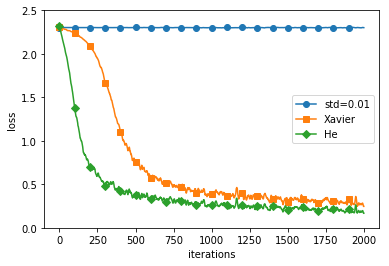

In [21]:
# 3.绘制图形==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# Batch Normalization

In [22]:
#batch_norm_test.py
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [24]:
# 减少学习数据
x_train = x_train[:1000]
t_train = t_train[:1000]

In [25]:
max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [26]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.099 - 0.128
epoch:1 | 0.097 - 0.132


../common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:2 | 0.097 - 0.138
epoch:3 | 0.097 - 0.161
epoch:4 | 0.097 - 0.172
epoch:5 | 0.097 - 0.192
epoch:6 | 0.097 - 0.212
epoch:7 | 0.097 - 0.224
epoch:8 | 0.097 - 0.247
epoch:9 | 0.097 - 0.26
epoch:10 | 0.097 - 0.285
epoch:11 | 0.097 - 0.299
epoch:12 | 0.097 - 0.305
epoch:13 | 0.097 - 0.322
epoch:14 | 0.097 - 0.349
epoch:15 | 0.097 - 0.364
epoch:16 | 0.097 - 0.367
epoch:17 | 0.097 - 0.391
epoch:18 | 0.097 - 0.403
epoch:19 | 0.097 - 0.408
============== 2/16 ==============
epoch:0 | 0.117 - 0.113


../common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.091
epoch:2 | 0.097 - 0.122
epoch:3 | 0.097 - 0.15
epoch:4 | 0.097 - 0.173
epoch:5 | 0.097 - 0.201
epoch:6 | 0.097 - 0.241
epoch:7 | 0.097 - 0.264
epoch:8 | 0.097 - 0.28
epoch:9 | 0.097 - 0.299
epoch:10 | 0.097 - 0.322
epoch:11 | 0.097 - 0.351
epoch:12 | 0.097 - 0.363
epoch:13 | 0.097 - 0.385
epoch:14 | 0.097 - 0.413
epoch:15 | 0.097 - 0.428
epoch:16 | 0.097 - 0.444
epoch:17 | 0.097 - 0.462
epoch:18 | 0.097 - 0.474
epoch:19 | 0.097 - 0.494
============== 3/16 ==============
epoch:0 | 0.09 - 0.133
epoch:1 | 0.329 - 0.132
epoch:2 | 0.419 - 0.193
epoch:3 | 0.506 - 0.201
epoch:4 | 0.603 - 0.221
epoch:5 | 0.662 - 0.259
epoch:6 | 0.696 - 0.291
epoch:7 | 0.747 - 0.327
epoch:8 | 0.805 - 0.362
epoch:9 | 0.832 - 0.381
epoch:10 | 0.871 - 0.41
epoch:11 | 0.882 - 0.447
epoch:12 | 0.91 - 0.466
epoch:13 | 0.924 - 0.488
epoch:14 | 0.94 - 0.53
epoch:15 | 0.954 - 0.56
epoch:16 | 0.959 - 0.577
epoch:17 | 0.967 - 0.603
epoch:18 | 0.969 - 0.621
epoch:19 | 0.974 - 0.642
============== 4/

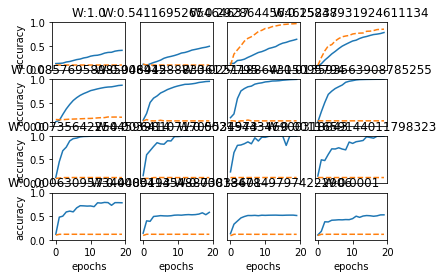

In [27]:
# 3.绘制图形==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
#     plt.legend(loc='lower right')
plt.show()

# 正则化

#### 1. 过拟合/权值衰减

In [28]:
#overfit_weight_decay.py
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [29]:
# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

In [30]:
# weight decay（权值衰减）的设定 =======================
weight_decay_lambda = 0 # 不使用权值衰减的情况
# weight_decay_lambda = 0.1
# ====================================================

In [31]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

In [32]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

In [33]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [34]:
iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [35]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.09333333333333334, test acc:0.1034
epoch:1, train acc:0.09666666666666666, test acc:0.1063
epoch:2, train acc:0.11333333333333333, test acc:0.1181
epoch:3, train acc:0.14333333333333334, test acc:0.1279
epoch:4, train acc:0.16333333333333333, test acc:0.1354
epoch:5, train acc:0.16666666666666666, test acc:0.1427
epoch:6, train acc:0.17666666666666667, test acc:0.1499
epoch:7, train acc:0.19666666666666666, test acc:0.1557
epoch:8, train acc:0.21666666666666667, test acc:0.163
epoch:9, train acc:0.24, test acc:0.1773
epoch:10, train acc:0.2633333333333333, test acc:0.1915
epoch:11, train acc:0.29333333333333333, test acc:0.197
epoch:12, train acc:0.31333333333333335, test acc:0.2092
epoch:13, train acc:0.32, test acc:0.2181
epoch:14, train acc:0.32666666666666666, test acc:0.2277
epoch:15, train acc:0.36, test acc:0.2458
epoch:16, train acc:0.35, test acc:0.2444
epoch:17, train acc:0.37, test acc:0.2598
epoch:18, train acc:0.4, test acc:0.274
epoch:19, train acc:0.

epoch:160, train acc:1.0, test acc:0.7718
epoch:161, train acc:1.0, test acc:0.7724
epoch:162, train acc:1.0, test acc:0.7738
epoch:163, train acc:1.0, test acc:0.7735
epoch:164, train acc:1.0, test acc:0.7715
epoch:165, train acc:1.0, test acc:0.7737
epoch:166, train acc:1.0, test acc:0.7765
epoch:167, train acc:1.0, test acc:0.7756
epoch:168, train acc:1.0, test acc:0.7768
epoch:169, train acc:1.0, test acc:0.7757
epoch:170, train acc:1.0, test acc:0.7742
epoch:171, train acc:1.0, test acc:0.7744
epoch:172, train acc:1.0, test acc:0.7752
epoch:173, train acc:1.0, test acc:0.7726
epoch:174, train acc:1.0, test acc:0.7752
epoch:175, train acc:1.0, test acc:0.776
epoch:176, train acc:1.0, test acc:0.774
epoch:177, train acc:1.0, test acc:0.7735
epoch:178, train acc:1.0, test acc:0.7743
epoch:179, train acc:1.0, test acc:0.775
epoch:180, train acc:1.0, test acc:0.7759
epoch:181, train acc:1.0, test acc:0.7765
epoch:182, train acc:1.0, test acc:0.7754
epoch:183, train acc:1.0, test acc:0.

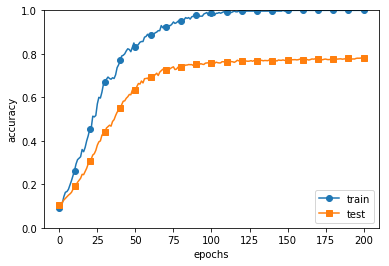

In [36]:
# 3.绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#### 2. Dropout

In [37]:
#overfit_dropout.py
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [38]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [39]:
# 为了再现过拟合，减少学习数据
x_train = x_train[:300]
t_train = t_train[:300]

In [40]:
# 设定是否使用Dropuout，以及比例 ========================
use_dropout = True  # 不使用Dropout的情况下为False
dropout_ratio = 0.2
# ====================================================

In [41]:
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list


train loss:2.3092333296449405
=== epoch:1, train acc:0.1, test acc:0.0885 ===
train loss:2.3016227721523954
train loss:2.298032665477489
train loss:2.2922171678658616
=== epoch:2, train acc:0.11, test acc:0.0915 ===
train loss:2.3038477189505744
train loss:2.3045682609272298
train loss:2.3057279972817097
=== epoch:3, train acc:0.11666666666666667, test acc:0.0958 ===
train loss:2.2977072692075975
train loss:2.296630626302877
train loss:2.3032627042847253
=== epoch:4, train acc:0.12666666666666668, test acc:0.099 ===
train loss:2.3134992756363433
train loss:2.2994836350916312
train loss:2.3001882443557475
=== epoch:5, train acc:0.12333333333333334, test acc:0.1 ===
train loss:2.3040949666617703
train loss:2.3008768538589903
train loss:2.3012491081228204
=== epoch:6, train acc:0.13, test acc:0.1051 ===
train loss:2.290973022464225
train loss:2.295517396158408
train loss:2.3019976240866935
=== epoch:7, train acc:0.13333333333333333, test acc:0.109 ===
train loss:2.306488198002184
train lo

=== epoch:56, train acc:0.2866666666666667, test acc:0.2329 ===
train loss:2.2631946772632165
train loss:2.2542238061427753
train loss:2.27926135297115
=== epoch:57, train acc:0.2833333333333333, test acc:0.2324 ===
train loss:2.269795510114213
train loss:2.2695620547620887
train loss:2.2715637687644534
=== epoch:58, train acc:0.29333333333333333, test acc:0.2329 ===
train loss:2.2720074650655144
train loss:2.257956596876438
train loss:2.262250294193953
=== epoch:59, train acc:0.28, test acc:0.2323 ===
train loss:2.2736589875462103
train loss:2.266038841030059
train loss:2.2743477498653584
=== epoch:60, train acc:0.2866666666666667, test acc:0.2323 ===
train loss:2.270649633965388
train loss:2.275372856829062
train loss:2.2552093502343653
=== epoch:61, train acc:0.2866666666666667, test acc:0.2324 ===
train loss:2.281951819214392
train loss:2.2584757575199834
train loss:2.2588250357589605
=== epoch:62, train acc:0.2866666666666667, test acc:0.233 ===
train loss:2.2695543197063355
train

=== epoch:112, train acc:0.2833333333333333, test acc:0.2308 ===
train loss:2.2134131610131744
train loss:2.228206068789997
train loss:2.2226384453304324
=== epoch:113, train acc:0.2833333333333333, test acc:0.2301 ===
train loss:2.2151539366392523
train loss:2.216750135738783
train loss:2.235197123018861
=== epoch:114, train acc:0.28, test acc:0.2295 ===
train loss:2.2221596778933317
train loss:2.2322010109434207
train loss:2.2180772419421366
=== epoch:115, train acc:0.2733333333333333, test acc:0.2306 ===
train loss:2.1932252618665387
train loss:2.2293036484715496
train loss:2.2375833780111276
=== epoch:116, train acc:0.2833333333333333, test acc:0.232 ===
train loss:2.251790290578956
train loss:2.1908859446918583
train loss:2.2408402375442145
=== epoch:117, train acc:0.2833333333333333, test acc:0.2328 ===
train loss:2.255043698159394
train loss:2.239879506290707
train loss:2.236556301332404
=== epoch:118, train acc:0.2866666666666667, test acc:0.2337 ===
train loss:2.18780143303255

=== epoch:168, train acc:0.31666666666666665, test acc:0.2517 ===
train loss:2.1234733671074424
train loss:2.155460174157786
train loss:2.1676951584487933
=== epoch:169, train acc:0.32, test acc:0.2539 ===
train loss:2.141020140607281
train loss:2.1272571850956883
train loss:2.1509430739237545
=== epoch:170, train acc:0.3233333333333333, test acc:0.2571 ===
train loss:2.1705890555503076
train loss:2.11500190969731
train loss:2.1273430841733547
=== epoch:171, train acc:0.3233333333333333, test acc:0.2597 ===
train loss:2.1333463304311184
train loss:2.0998077035034273
train loss:2.083583431275197
=== epoch:172, train acc:0.32, test acc:0.2616 ===
train loss:2.112013305996179
train loss:2.0743551881646773
train loss:2.1617144409654863
=== epoch:173, train acc:0.32666666666666666, test acc:0.2635 ===
train loss:2.148453827212391
train loss:2.0944456460188774
train loss:2.121259516682669
=== epoch:174, train acc:0.32666666666666666, test acc:0.2644 ===
train loss:2.1238778547062314
train lo

=== epoch:224, train acc:0.38333333333333336, test acc:0.3173 ===
train loss:1.9669775311080722
train loss:1.9892334295280474
train loss:2.016567888382342
=== epoch:225, train acc:0.39, test acc:0.3182 ===
train loss:1.9641499711690702
train loss:1.9729324489863815
train loss:2.0282876635446874
=== epoch:226, train acc:0.38666666666666666, test acc:0.3215 ===
train loss:1.996315400511945
train loss:1.9701935348094497
train loss:2.0273720721084043
=== epoch:227, train acc:0.4, test acc:0.3238 ===
train loss:1.9225126348957866
train loss:2.0278804188736284
train loss:2.0332911957901483
=== epoch:228, train acc:0.4033333333333333, test acc:0.3252 ===
train loss:1.9484445971307471
train loss:1.815736496088572
train loss:1.9680899369942564
=== epoch:229, train acc:0.39666666666666667, test acc:0.3246 ===
train loss:1.8825772140979793
train loss:1.913814642456298
train loss:1.8848657376714513
=== epoch:230, train acc:0.39, test acc:0.3244 ===
train loss:1.962492232068154
train loss:1.8908432

=== epoch:280, train acc:0.4533333333333333, test acc:0.3619 ===
train loss:1.7631057911631416
train loss:1.8349650373006827
train loss:1.7697470215205147
=== epoch:281, train acc:0.45666666666666667, test acc:0.3634 ===
train loss:1.7265860885316053
train loss:1.832955434584539
train loss:1.7824444176934293
=== epoch:282, train acc:0.45666666666666667, test acc:0.3643 ===
train loss:1.8049852226594174
train loss:1.817761020683288
train loss:1.780897665794535
=== epoch:283, train acc:0.44666666666666666, test acc:0.3624 ===
train loss:1.7801499453830434
train loss:1.7329989980244764
train loss:1.7237404837168624
=== epoch:284, train acc:0.4533333333333333, test acc:0.3628 ===
train loss:1.8013135329573293
train loss:1.7445890721408153
train loss:1.835944465525931
=== epoch:285, train acc:0.46, test acc:0.3653 ===
train loss:1.7222821842457583
train loss:1.7681535826656503
train loss:1.7210767713342645
=== epoch:286, train acc:0.4533333333333333, test acc:0.3658 ===
train loss:1.6864789

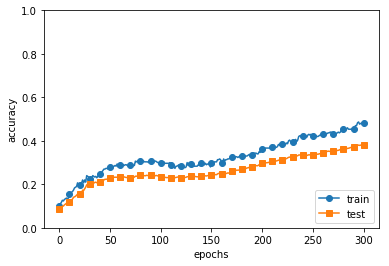

In [42]:
# 绘制图形==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 超参数的验证

#### 超参数最优化

In [43]:
#hyperparameter_optimization.py
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

In [44]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [45]:
# 为了实现高速化，减少训练数据
x_train = x_train[:500]
t_train = t_train[:500]

In [46]:
# 分割验证数据
validation_rate = 0.20
validation_num = x_train.shape[0] * validation_rate
x_train, t_train = shuffle_dataset(x_train, t_train)
validation_num = int(validation_num)    #需要将validation_num由浮点型转为整型

In [47]:
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [48]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [49]:
# 超参数的随机搜索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 指定搜索的超参数的范围===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.47 | lr:0.0033623203933517212, weight decay:9.851279992705235e-08
val acc:0.19 | lr:1.9207256353202975e-06, weight decay:4.297455385440316e-08
val acc:0.48 | lr:0.0027685677985800168, weight decay:4.035666464446109e-05
val acc:0.13 | lr:1.1051181586315505e-06, weight decay:4.113064911122966e-05
val acc:0.15 | lr:0.0006932851776979767, weight decay:5.5276255292451395e-05
val acc:0.13 | lr:4.793728735761228e-06, weight decay:3.164211013373135e-06
val acc:0.06 | lr:4.697159876046318e-05, weight decay:2.4114676314683435e-05
val acc:0.11 | lr:3.1451646529606765e-06, weight decay:6.687799627012859e-05
val acc:0.13 | lr:1.942857512401447e-06, weight decay:5.017459454164785e-08
val acc:0.03 | lr:3.808849010511431e-06, weight decay:8.688179534766595e-08
val acc:0.11 | lr:1.8196813301522893e-05, weight decay:1.5780928514981277e-05
val acc:0.14 | lr:0.00017639414464468465, weight decay:2.093405545412186e-06
val acc:0.15 | lr:7.908566555880652e-06, weight decay:1.1686818541127709e-07
val

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.84) | lr:0.006976596624597631, weight decay:2.124928537395169e-06
Best-2(val acc:0.84) | lr:0.008119080964012287, weight decay:1.3252296171128692e-08
Best-3(val acc:0.82) | lr:0.009498982692701151, weight decay:5.194195487296423e-05
Best-4(val acc:0.78) | lr:0.007952848678364747, weight decay:9.708633242099827e-08
Best-5(val acc:0.75) | lr:0.008318963843989178, weight decay:1.1646423746997656e-07
Best-6(val acc:0.7) | lr:0.004559747053623999, weight decay:1.386917891891143e-08
Best-7(val acc:0.67) | lr:0.0059520106528093, weight decay:2.648540050069242e-06
Best-8(val acc:0.48) | lr:0.0027685677985800168, weight decay:4.035666464446109e-05
Best-9(val acc:0.48) | lr:0.0028235179728892633, weight decay:1.3985700231391108e-08
Best-10(val acc:0.47) | lr:0.0033623203933517212, weight decay:9.851279992705235e-08
Best-11(val acc:0.43) | lr:0.001915272793045808, weight decay:4.629393103875728e-07
Best-12(val acc:0.4) |

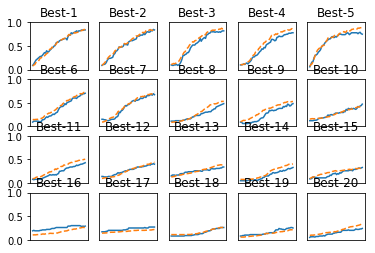

In [50]:
# 绘制图形========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()